# 통계 분석

**다음과 같은 금융 모형은 수익률이 정규분포라 가정**
- 평균-분산 포트폴리오 이론(Mean-Variance Portfolio Theory, MPT)
- 자본 자산 가격결정 모형(Capital Asset Pricing Model, CAPM)  
  
**다른 중요한 가정은 선형성; 수요와 가격 간 선형적인 관계를 가정**
- 주식의 수요와 가격 간 선형적인 관계를 가정
- 시장의 유도성이 완벽하여 수요 변하더라도 금융 상품의 단위 가격에 영향X 가정  
  
**효율적 시장 가설**
- 효율적 시장은 모든 정보가 가격에 반영되어 있는 시장.  
효율적 시장 가설이 맞다면, 주식 가격은 무작위로 움직이게 되며 수익률은 정규분포

**포트폴리오 이론**
- 주식 수익률이 정규분포를 이루면 최적 포트폴리오를 선택하는 문제는 각 주식의 평균 수익률과  
  수익률의 분산(변동성) 그리고 각 주식 사이의 공분산만을 고려하는 투자 결정 문제로 귀착

**자본 자산 가격결정 모형**
- 주식 수익률이 정규분포를 이루면 개별 주식의 가격과 전체 시장 지수의 관계는 베타라 불리는  
  개별 주식과 시장 지수의 공통 움직임을 설명하는 측도로 간단히 표현 가능


## 정규성 검정

In [11]:
import math
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def gen_paths(S0, r, sigma, T, M, I):
    ''' Generate Monte Carlo paths for geometric Brownian motion.
    
    Parameters
    ==========
    S0 : float
        initial stock/index value
    r : float
        constant short rate
    sigma : float
        constant volatility
    T : float
        final time horizon
    M : int
        number of time steps/intervals
    I : int
        number of paths to be simulated
        
    Returns
    =======
    paths : ndarray, shape (M + 1, I)
        simulated paths given the parameters
    '''
    
    dt = T / M
    paths = np.zeros((M + 1, I))
    paths[0] = S0
    for t in range(1, M + 1):
        rand = np.random.standard_normal(I)
        rand = (rand - rand.mean()) / rand.std() # standardize random numbers
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt +
                                         sigma * math.sqrt(dt) * rand)
    return paths

In [7]:
S0 = 100.
r = 0.05
sigma = 0.2
T = 1.0
M = 50
I = 250000
np.random.seed(1000)

paths = gen_paths(S0, r, sigma, T, M, I)

Text(0, 0.5, 'index level')

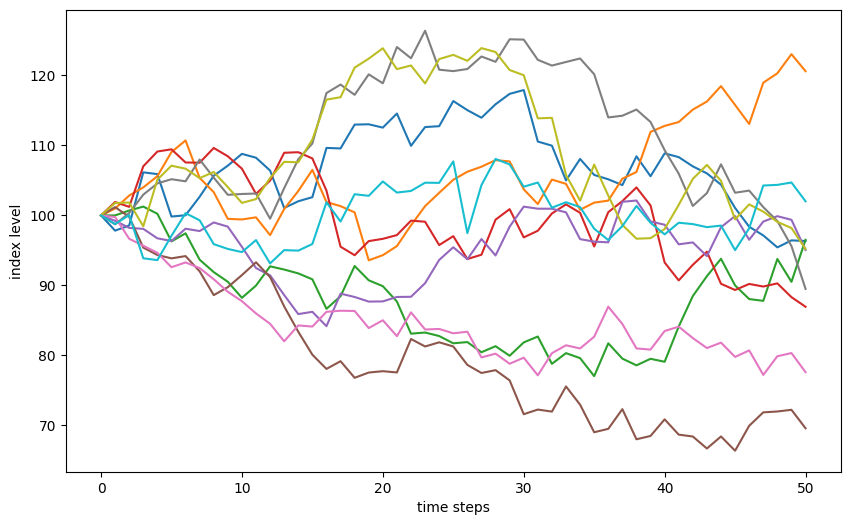

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(paths[:, :10])
plt.xlabel('time steps')
plt.ylabel('index level')

In [15]:
log_returns = np.log(paths[1:] / paths[:-1])

log_returns[:, 0].round(4)

array([-0.022 ,  0.0075,  0.0743, -0.0024, -0.059 ,  0.0018,  0.0261,
        0.0289,  0.0136,  0.0156, -0.0051, -0.0171, -0.0516,  0.0095,
        0.0057,  0.0663, -0.0006,  0.0306,  0.0004, -0.0042,  0.0177,
       -0.0411,  0.0241,  0.0011,  0.0314, -0.0112, -0.0095,  0.0167,
        0.0128,  0.0047, -0.0645, -0.0053, -0.0463,  0.0288, -0.0214,
       -0.0059, -0.0079,  0.0386, -0.0266,  0.0305, -0.0049, -0.0123,
       -0.0094, -0.0153, -0.0324, -0.0269, -0.0127, -0.0178,  0.0104,
       -0.0009])

In [16]:
def print_statistics(array):
    ''' Prints selected statistics.
    
    Parameters
    ==========
    array : ndarray
        object to generate statistics on
    '''
    sta = scs.describe(array)
    print('%14s %15s' % ('statistic', 'value'))
    print(30 * '-')
    print('%14s %15.5f' % ('size', sta[0]))
    print('%14s %15.5f' % ('min', sta[1][0]))
    print('%14s %15.5f' % ('max', sta[1][1]))
    print('%14s %15.5f' % ('mean', sta[2]))
    print('%14s %15.5f' % ('std', np.sqrt(sta[3])))
    print('%14s %15.5f' % ('skew', sta[4]))
    print('%14s %15.5f' % ('kurtosis', sta[5]))

print_statistics(log_returns.flatten())

     statistic           value
------------------------------
          size  12500000.00000
           min        -0.15664
           max         0.15371
          mean         0.00060
           std         0.02828
          skew         0.00055
      kurtosis         0.00085


**히스토그램을 통한 시각화를 통해 정규분포와 비교 -> 정규성 검정**

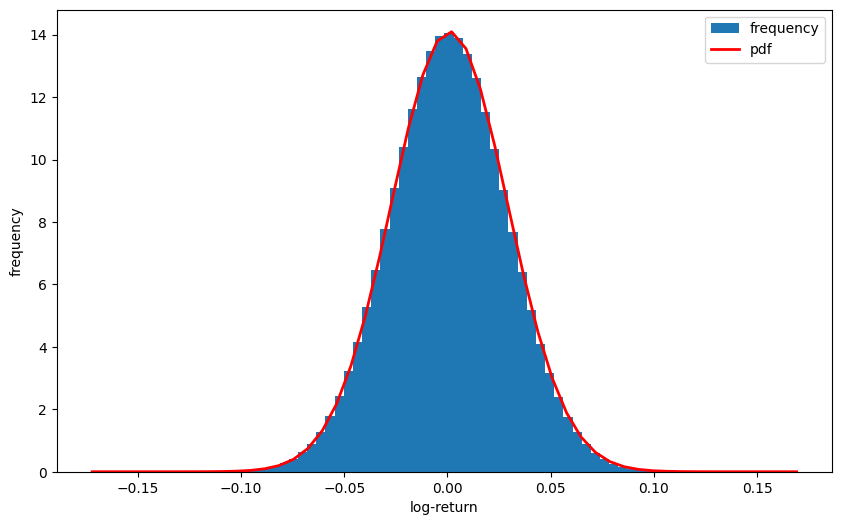

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(log_returns.flatten(), bins=70, density=True, label='frequency')
plt.xlabel('log-return')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, loc=r / M, scale=sigma / math.sqrt(M)),
            'r', lw=2.0, label='pdf')
plt.legend()

**통계 패키지를 이용한 p검정**

In [20]:
def normality_tests(arr):
    ''' Tests for normality distribution of given data set.
    
    Parameters
    ==========
    array: ndarray
        object to generate statistics on
    '''
    print('Skew of data set %14.3f' % scs.skew(arr))
    print('Skew test p-value %14.3f' % scs.skewtest(arr)[1])
    print('Kurt of data set %14.3f' % scs.kurtosis(arr))
    print('Kurt test p-value %14.3f' % scs.kurtosistest(arr)[1])
    print('Norm test p-value %14.3f' % scs.normaltest(arr)[1])

normality_tests(log_returns.flatten())

Skew of data set          0.001
Skew test p-value          0.430
Kurt of data set          0.001
Kurt test p-value          0.541
Norm test p-value          0.607


## 포트폴리오 최적화

- 보유 주식을 분산(diversification)하여 수익률을 극대화
- 공분산행렬(Covariance matrix)는 포트폴리오 선택 과정에서 가장 중요한 정보  
  
**샤프 지수**  
$S R \equiv \frac{\mu_p-r_f}{\sigma_p}$  
$\mu_p$ : 포트폴리오 수익률  
$r_f$ : 무위험 이자율  
$\sigma_p$ : 포트폴리오 표준편차

[*********************100%***********************]  4 of 4 completed


array([[<Axes: title={'center': 'AAPL'}>,
        <Axes: title={'center': 'AMZN'}>],
       [<Axes: title={'center': 'GLD'}>,
        <Axes: title={'center': 'MSFT'}>]], dtype=object)

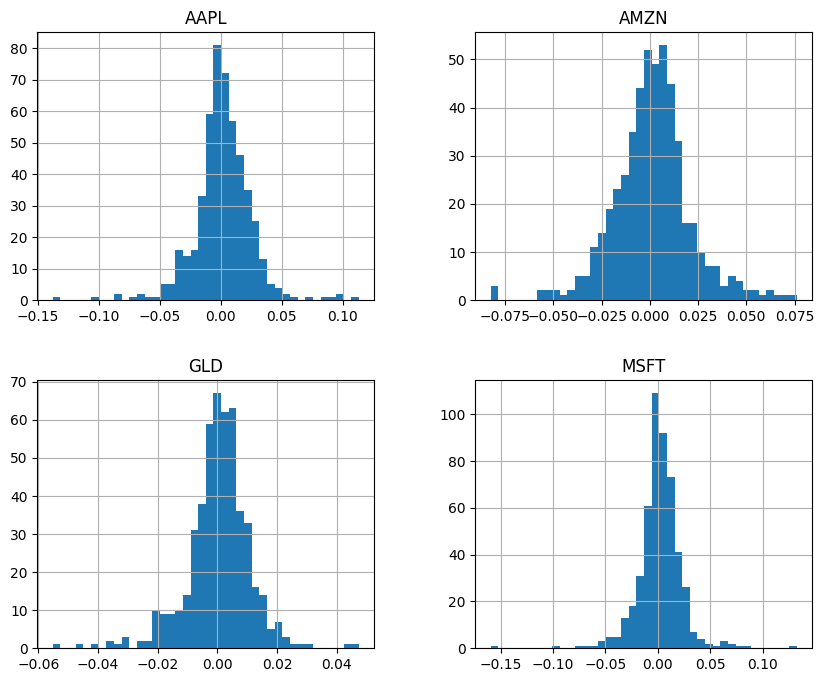

In [25]:
import pandas as pd
import numpy as np
import yfinance as yf  # You might need to install yfinance: pip install yfinance

# Define the stock symbols
symbols = ['AAPL', 'MSFT', 'AMZN', 'GLD']

noa = len(symbols)

# Load historical stock prices using yfinance
raw = yf.download(symbols, start='2020-01-01', end='2022-01-01')['Adj Close']

# Calculate log returns
rets = np.log(raw / raw.shift(1))

# Plot the histogram
rets.hist(bins=40, figsize=(10, 8))

**다양한 무작위 포트폴리오 비중에 대한 수익률과 변동성 기댓값**

In [26]:
weights = np.random.random(noa)
weights /= np.sum(weights)

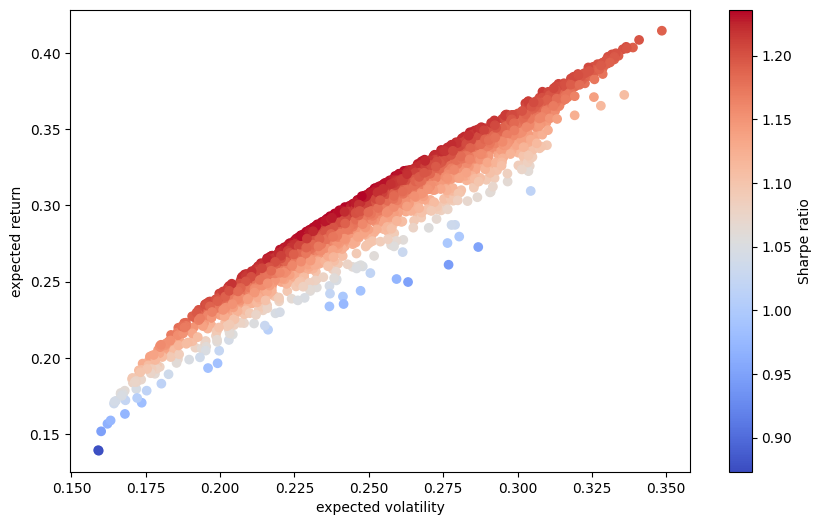

In [28]:
def port_ret(weights):
    return np.sum(rets.mean() * weights) * 252

def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))

prets = []
pvols = []
for p in range (2500):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(port_ret(weights))
    pvols.append(port_vol(weights))

prets = np.array(prets)
pvols = np.array(pvols)

plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols, marker='o', cmap='coolwarm')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

**샤프 지수 최대화 -> 샤프 지수의 음숫값 최소화**

In [29]:
import scipy.optimize as sco

def min_func_sharpe(weights):
    return -port_ret(weights) / port_vol(weights)

cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

bnds = tuple((0, 1) for x in range(noa))

eweights = np.array(noa * [1. / noa,])
eweights

array([0.25, 0.25, 0.25, 0.25])

In [31]:
opts = sco.minimize(min_func_sharpe, eweights, method='SLSQP', bounds=bnds, constraints=cons)
opts

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.236393028468987
       x: [ 3.946e-01  5.061e-03  3.604e-01  2.400e-01]
     nit: 5
     jac: [-4.033e-04  1.842e-04  4.321e-06  6.484e-04]
    nfev: 26
    njev: 5

In [32]:
opts['x'].round(3)

array([0.395, 0.005, 0.36 , 0.24 ])

**포트폴리오 분산 최소화**

In [33]:
optv = sco.minimize(port_vol, eweights, method='SLSQP', bounds=bnds, constraints=cons)
optv

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.15807538840192822
       x: [ 8.041e-19  1.027e-01  8.139e-01  8.339e-02]
     nit: 9
     jac: [ 1.628e-01  1.589e-01  1.579e-01  1.583e-01]
    nfev: 46
    njev: 9

## 효율적 투자선
- 여러 개의 초기 조건을 가지고 최적 포트폴리오 집합을 달성 목표

In [39]:
cons = ({'type': 'eq', 'fun': lambda x: port_ret(x) - tret},
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

trets = np.linspace(0.05, 0.2, 50)
tvols = []

for tret in trets:
    res = sco.minimize(port_vol, eweights, method='SLSQP',
                       bounds=bnds, constraints=cons)
    tvols.append(res['fun'])

tvols = np.array(tvols)

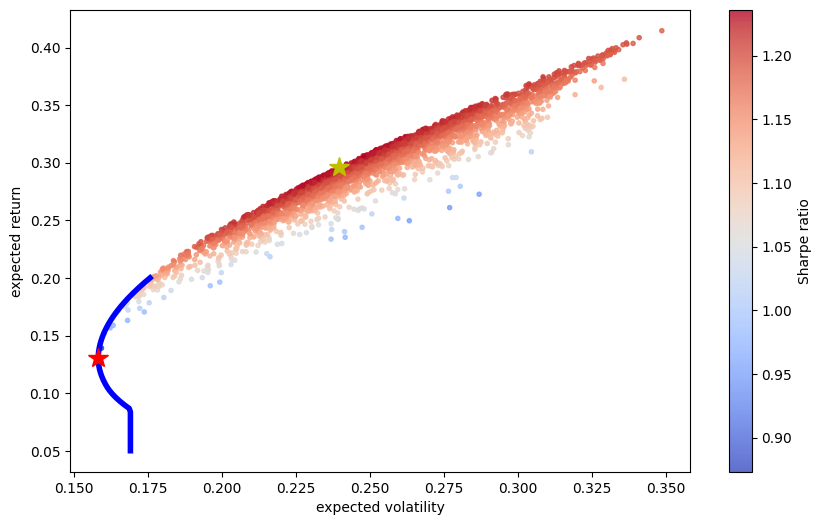

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols, 
            marker='.', alpha=0.8, cmap='coolwarm')
plt.plot(tvols, trets, 'b', lw=4.0)
plt.plot(port_vol(opts['x']), port_ret(opts['x']),
            'y*', markersize=15.0)
plt.plot(port_vol(optv['x']), port_ret(optv['x']),
            'r*', markersize=15.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')  
plt.colorbar(label='Sharpe ratio')